In [11]:
from matplotlib import pyplot as plt
import numpy as np
from linReg import *
import csv
from math import exp

In [28]:
X,Y = [],[]

# tranformation functions to normalize data
def trMinMax(x, m, M):
    return (x - m)/(M - m)

def trLogistic(x):
    return 1/(1 + exp(-x))

# open and format data 
with open('car data.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        X.append(int(row["speed"]))
        Y.append(int(row["dist"]))


### using Min-Max transformer

In [29]:
# data normalization
mx, Mx, my, My = min(X),max(X),min(Y),max(Y)

for i in range(len(X)):
    # using max-min tranformer
    X[i], Y[i] = trMinMax(X[i],mx,Mx), trMinMax(Y[i], my,My)

### using Logistic transformer

In [19]:
for i in range(len(X)):
    # using logitic transformer
    X[i], Y[i] = trLogistic(X[i]), trLogistic(Y[i])

### using method 1 of linear regression (gradient descent)

Optimal slope = 0.29185873849564536 | Optimal intercept = 0.19974572817621056
Empirical Error Value = 0.026768030233593358


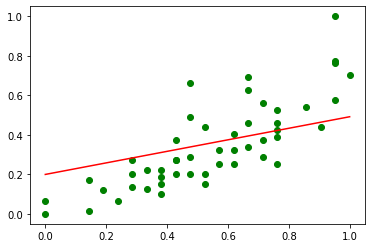

In [26]:
# calculate the regression hyperplan slop and intercept (2D case)
iter = 1000
a, b = 0, 0
for e in range(iter):
    a, b = gradient(a,b,X,Y,0.003)

    # # show results
print("Optimal slope =",a , "| Optimal intercept =",b)
print("Empirical Error Value =", loss(a,b,X,Y))

# # plot results
plt.plot(X,Y,'o',color="green")
plt.plot(np.linspace(0,1,10), [a * x + b for x in np.linspace(0,1,10)], color="red")
plt.show()

### using method 2 of linear regression (linear lagebra solver / Least Square Algorithm)

Optimal slope = 0.739945211162768 | Optimal intercept = -0.048944982706468465
Empirical Error Value = 0.8252529908207826


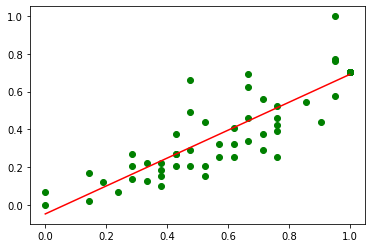

In [30]:
# linear reagression with LSA
a, b = linearReg(X,Y)

# # show results
print("Optimal slope =",a , "| Optimal intercept =",b)
print("Empirical Error Value =", Lossf(X,Y))

# # plot results
plt.plot(X,Y,'o',color="green")
plt.plot(np.linspace(0,1,10), [a * x + b for x in np.linspace(0,1,10)], color="red")
plt.show()